# Making Animations using MoviePy

This notebook shows how to make animations using MoviePy and Matplotlib. Here are links to the MoviePy documentation and a short tutorial:

* http://zulko.github.io/moviepy/
* http://zulko.github.io/blog/2014/11/29/data-animations-with-python-and-moviepy/

Let's start by importing everything we need:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

Imageio: 'libfreeimage-3.16.0-linux64.so' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/freeimage/libfreeimage-3.16.0-linux64.so (4.6 MB)
Downloading: 8192/4830080 bytes (0.2%)507904/4830080 bytes (10.5%)2449408/4830080 bytes (50.7%)4830080/4830080 bytes (100.0%)
  Done
File saved as /nfshome/hdthomas/.imageio/freeimage/libfreeimage-3.16.0-linux64.so.
Imageio: 'ffmpeg.linux64' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg.linux64 (27.2 MB)
Downloading: 8192/28549024 bytes (0.0%)540672/28549024 bytes (1.9%)2162688/28549024 bytes (7.6%)4849664/28549024 bytes (17.0%)8716288/28549024 bytes (30.5%)

  warn(skimage_deprecation('The `skimage.filter` module has been renamed '



File saved as /nfshome/hdthomas/.imageio/ffmpeg/ffmpeg.linux64.


To create an animation we need to do two things:

1. Create the initial visualization, with handles on the figure and axes object.
2. Write a function that will get called for each frame that updates the data and returns the next frame.

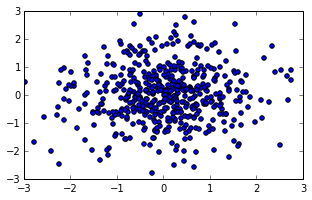

In [2]:
duration = 10.0 # this is the total time

N = 500

# Make the initial plot outside the animation function
fig_mpl, ax = plt.subplots(1,figsize=(5,3), facecolor='white')
x = np.random.normal(0.0, 1.0, size=N)
y = np.random.normal(0.0, 1.0, size=N)
plt.sca(ax)
plt.xlim(-3,3)
plt.ylim(-3,3)
scat = ax.scatter(x, y)

def make_frame_mpl(t):
    # t is the current time between [0,duration]
    newy = y*np.cos(4.0*t/duration)
    # Just update the data on each frame
    # set_offset takes a Nx2 dimensional array of positions
    scat.set_offsets(np.transpose(np.vstack([x, newy])))
    # The mplfig_to_npimage convert the matplotlib figure to an image that
    # moviepy can work with:
    return mplfig_to_npimage(fig_mpl)

animation = mpy.VideoClip(make_frame_mpl, duration=duration)

Use the following call to generate and display the animation in the notebook:

In [3]:
animation.ipython_display(fps=24)

Use the following to save the animation to a file that can be uploaded you YouTube:

In [4]:
animation.write_videofile("scatter_animation.mp4", fps=20)

[MoviePy] >>>> Building video scatter_animation.mp4
[MoviePy] Writing video scatter_animation.mp4
[MoviePy] Done.
[MoviePy] >>>> Video ready: scatter_animation.mp4 

